The dataset used for this word embedding is a food review dataset stored in a CSV file. The dataset is a public dataset consisting of over 1000 reviews containing a reaction tagged to each of the reviews. The reaction has two classes, class 1 represents a positive review and class 0 represents a negative review. 

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/food_review.csv")
#Visualizing Data
df.head()

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


# **Data Preprocessing**

In [3]:
#Visualizing the Shape of the data 
df.shape

(1000, 2)

In [4]:
#Checking for NULL values
df.isnull().sum()

review      0
reaction    0
dtype: int64

In [5]:
#Checking for NA values
df.isna().sum()

review      0
reaction    0
dtype: int64

In [6]:
#Checking for duplicate values
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 4
Shape of Data: (1000, 2)


In [7]:
#Removing duplicate values 
df.drop_duplicates(inplace = True)
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 0
Shape of Data: (996, 2)


# **Vectorization using TF-IDF**

In [8]:
#Importing Term Frequency-Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
#Vectorization of input variables using TF-IDF
tv = TfidfVectorizer()
X = tv.fit_transform(df["review"].values)
X = pd.DataFrame(X.todense(),columns=tv.get_feature_names())

In [10]:
#Input Variable
X.head()

,00,10,100,11,12,15,17,1979,20,2007,...,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.353539,0.0,0.0,0.0,0.0,0.0,0.0


# **Splitting of Data**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Creating training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,df["reaction"],test_size=0.25,random_state=99)

In [13]:
#Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(747, 2035)
(747,)
(249, 2035)
(249,)


# **Model Building and Evaluation**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [15]:
model = GradientBoostingClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#Computing Accuracy Score
print("Accuracy Score:",accuracy_score(y_pred,y_test))

Accuracy Score: 0.7831325301204819


In [16]:
#Prining Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.70      0.80       149
           1       0.67      0.90      0.77       100

    accuracy                           0.78       249
   macro avg       0.79      0.80      0.78       249
weighted avg       0.82      0.78      0.78       249



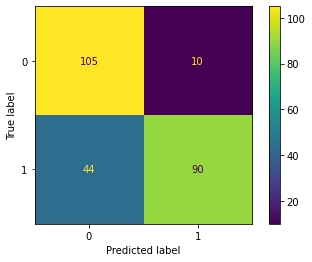

In [17]:
#Plotting Confusion Matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

# **Test Cases Using Support GradientBoostingClassifier Model**

In [18]:
#Prediction function

def prediction(a):
  a = np.array([a])
  #Vectorization using TFIDF
  a = tv.transform(a)
  #PREDICTED VALUE
  x = model.predict(a)
  return x

In [19]:
df["review"][19]

'The burger is good beef, cooked just right.'

In [20]:
a = "The burger is good beef, cooked just right."
print(prediction(a))

[1]


In [21]:
df["review"][100]

"The food is about on par with Denny's, which is to say, not good at all."

In [22]:
a = "The food is about on par with Denny's, which is to say, not good at all."
print(prediction(a))

[0]


In [25]:
a="the food tastes great"
print(prediction(a))

[1]
